In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.metrics import mean_squared_error , r2_score

import warnings
warnings.filterwarnings('ignore')

In [21]:
data = fetch_california_housing()
df = pd.DataFrame(data.data , columns = data.feature_names)
df["Price"] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
#preprocessing
X = df.drop("Price" ,  axis = 1)
y = df["Price"]

X_train , x_test ,y_train ,  y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

y_test_scaled = scaler.transform(x_test)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.575787706032451
Linear Regression RMSE: 0.7455813830127763


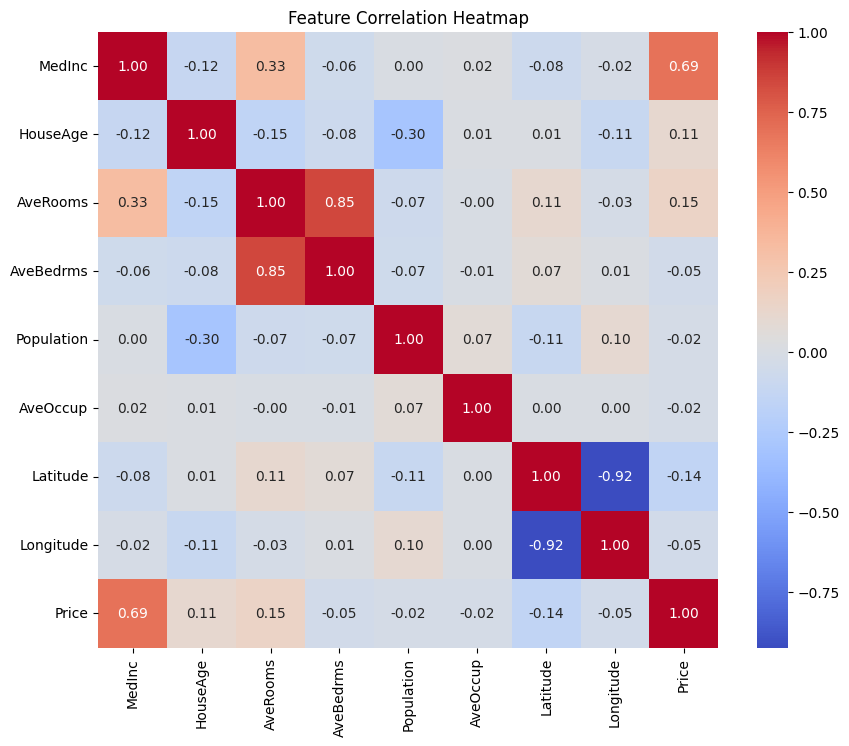

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Ridge Regression

In [28]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled , y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge r2:" , r2_score (y_test , y_pred_ridge))
print("Ridge RMSE:" , np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

Ridge r2: 0.5757905180002312
Ridge RMSE: 0.7455789118982769


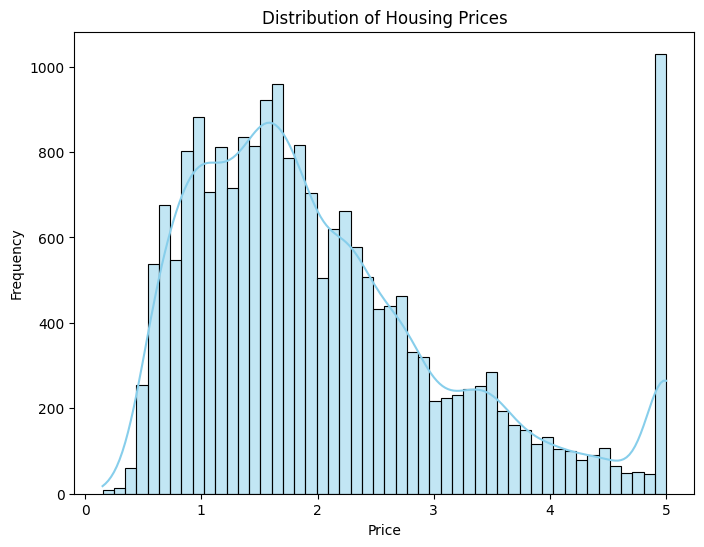

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Price"], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Lasso Regression


In [31]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso R²: 0.48136113250290735
Lasso RMSE: 0.8243961598848472


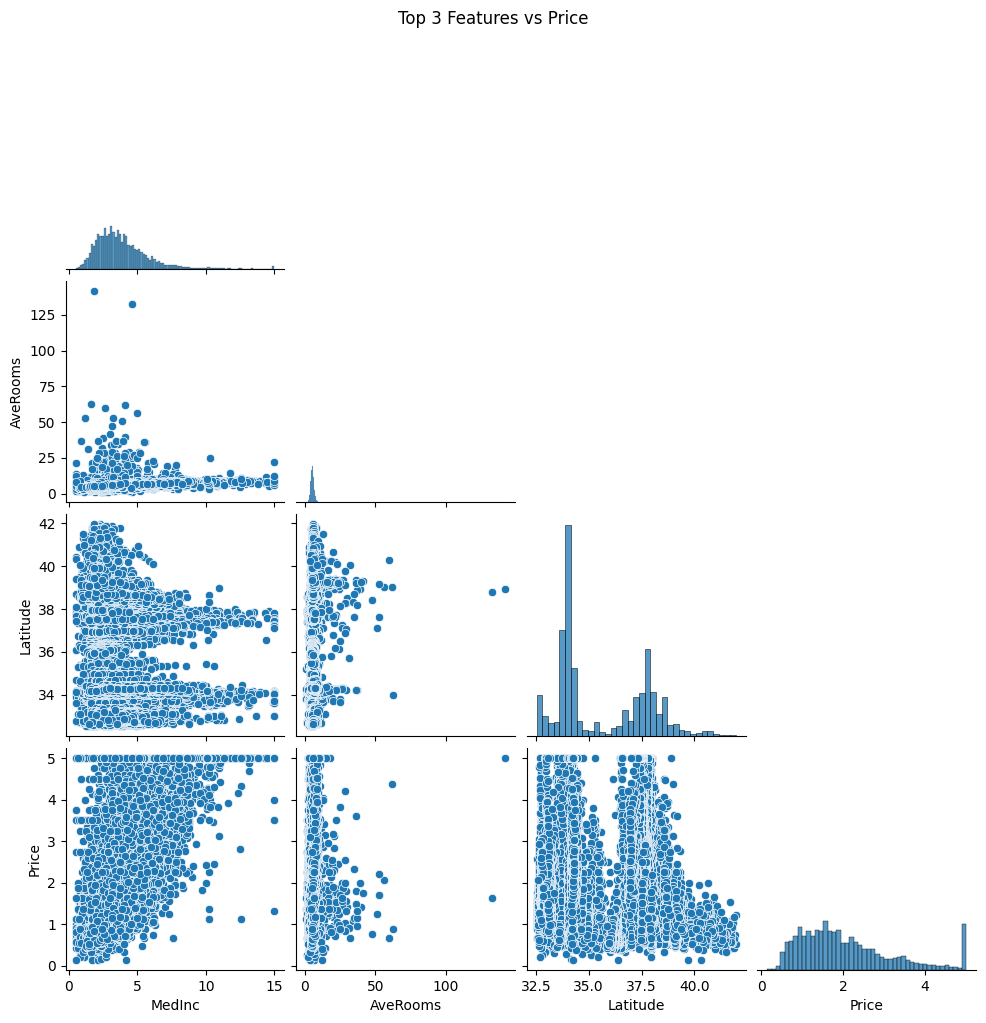

In [32]:
top_features = df.corr()["Price"].abs().sort_values(ascending=False)[1:4].index.tolist()
sns.pairplot(df[top_features + ["Price"]], corner=True)
plt.suptitle("Top 3 Features vs Price", y=1.02)
plt.show()


Elastic Net Regression

In [33]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

y_pred_elastic = elastic.predict(X_test_scaled)
print("ElasticNet R²:", r2_score(y_test, y_pred_elastic))
print("ElasticNet RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))


ElasticNet R²: 0.5147647043408876
ElasticNet RMSE: 0.79740622520211


Polynomial Regression

In [34]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression R²: 0.6456819729261861
Polynomial Regression RMSE: 0.6813967448044699


Comparing Results

In [35]:
models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_elastic),
    r2_score(y_test, y_pred_poly)
]
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    np.sqrt(mean_squared_error(y_test, y_pred_elastic)),
    np.sqrt(mean_squared_error(y_test, y_pred_poly))
]

results = pd.DataFrame({"Model": models, "R2 Score": r2_scores, "RMSE": rmse_scores})
results


,Model,R2 Score,RMSE
0,Linear,0.575788,0.745581
1,Ridge,0.575791,0.745579
2,Lasso,0.481361,0.824396
3,ElasticNet,0.514765,0.797406
4,Polynomial,0.645682,0.681397


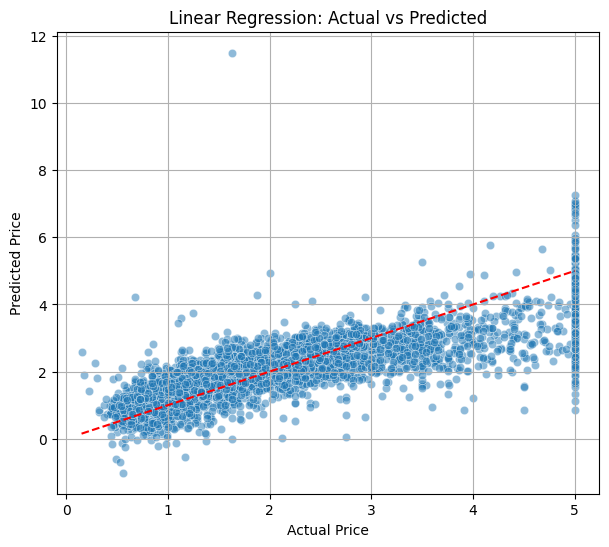

In [36]:
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")


Bar plot of Model Performance Comparison

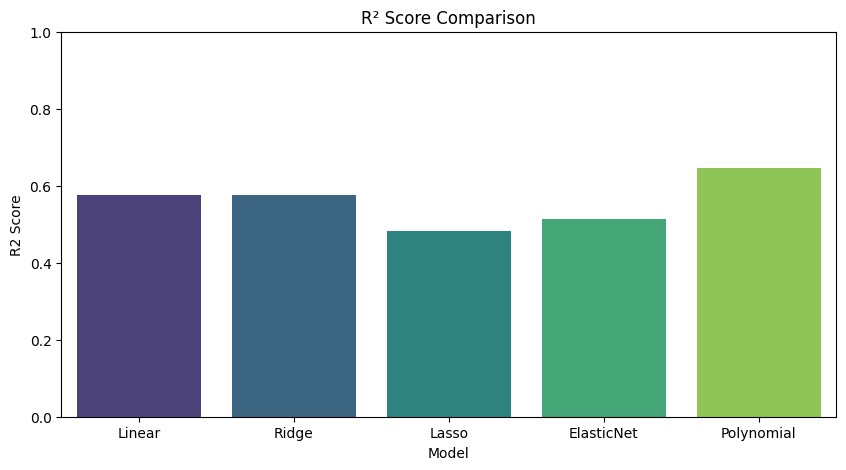

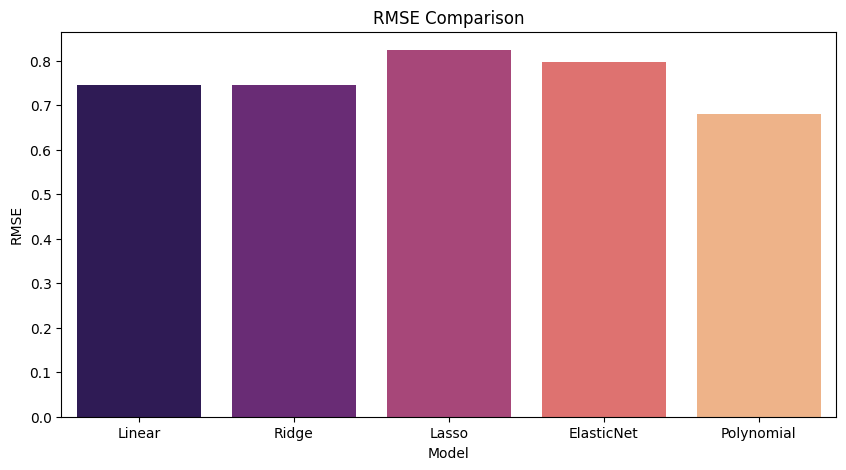

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results["Model"], y=results["R2 Score"], palette="viridis")
plt.title("R² Score Comparison")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=results["Model"], y=results["RMSE"], palette="magma")
plt.title("RMSE Comparison")
plt.show()
